# Correlations

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
sectors = pd.read_csv('data/sectors.csv')
commitments = pd.read_csv('data/commitments.csv')

In [3]:
sectors = sectors[sectors['YEAR']!=2017]

In [6]:
companies = sectors.groupby('COMPANY NAME').median(numeric_only=True).reset_index().drop(columns='YEAR')

Calculate correlation coefficients according to Kendall Tau because this method is preferred in the case of small sample sizes or the presence of outliers 

In [7]:
# corr = companies.corr(method='pearson', numeric_only=True)
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Heatmap Using Pearson Correlation Coefficient')
# plt.show();


## Sectors Merged with Commitments

In [8]:
# sectors.merge(commitments, on='')
cleaned_comm = commitments[['Company Name', 'Sector', 'Net Zero By X', 'RE100 By X',
       'SBTI Committed', 'SBTI Targets', 'Pledge to Adopt Low-Carbon Tech',
       'Pledge to Invest in Low-Carbon']]

In [9]:
def percent_change(final, initial):
    result = ((final - initial)/initial)* 100
    return result

In [10]:
initial_year = sectors[sectors['YEAR']==2018]['TOTAL EMISSIONS'].values
final_year = sectors[sectors['YEAR']==2022]['TOTAL EMISSIONS'].values
percent = percent_change(final_year, initial_year)

In [11]:
percent

array([  -4.93804517,  -11.75110928,   82.29351323,  -43.16724785,
        -25.14144932,   -1.97828568,   -6.75532342,   25.13573064,
         -7.07964263,  -31.39347563,    0.        ,  -18.28976249,
         31.76374442,  -15.03818997,  424.59016393,  -25.93223465,
        -66.07748081,  181.21904762,           nan,           nan,
                 nan,   60.84353673,   56.50842385,           nan,
         48.72314439,  269.74629936,  105.94230364,           nan,
          1.59312962,   -8.87881985, 1190.74815494,           nan,
         38.78728513,   -8.08683571,    1.31101639,   60.51801802,
        -13.77514952,  453.80462428,   21.61436575,  187.76752111,
         50.97239245])

In [12]:
percents = pd.read_csv('data/percentchanges.csv')
percents_df = percents.drop(columns='SECTOR')
percents_df = percents_df.rename(columns={
    'COMPANY NAME' : 'Company Name'
})

In [13]:
merged = cleaned_comm.merge(percents_df, on='Company Name')
corr_matrix = merged.corr(method='kendall', numeric_only=True)

In [14]:
corr_matrix.columns

Index(['Net Zero By X', 'RE100 By X', 'SBTI Committed', 'SBTI Targets',
       'Pledge to Invest in Low-Carbon', 'PERCENT CHANGE',
       'SCOPE 1 PERCENT CHANGE', 'SCOPE 2 PERCENT CHANGE',
       'SCOPE 3 PERCENT CHANGE', 'CI PERCENT CHANGE'],
      dtype='object')

<Axes: >

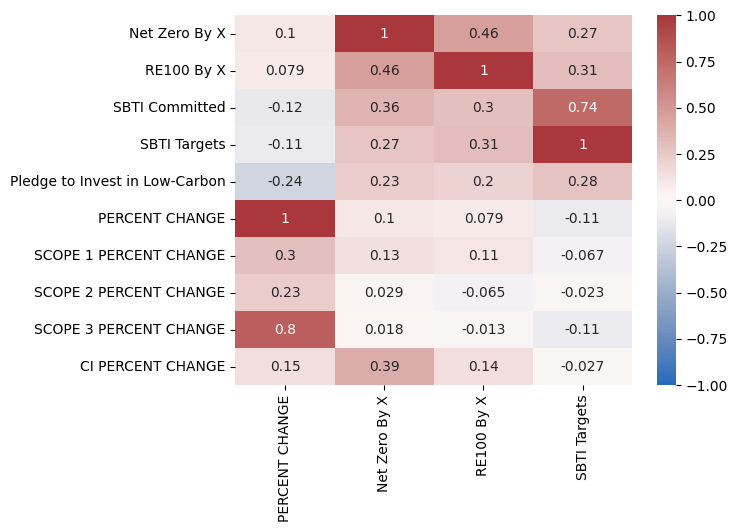

In [15]:
# handwritten example of 5x2 smaller table to sanity check kendall tau
# make sure percentages are being represented accurately
# can change cmap range (-1, 1)
submatrix  = corr_matrix[['PERCENT CHANGE', 'Net Zero By X', 'RE100 By X', 'SBTI Targets']]
sns.heatmap(submatrix, annot=True, cmap='vlag', vmin=-1, vmax=1)

In [16]:
activities = pd.read_csv('data/activities.csv', skiprows=1)
activities_df = activities.drop(columns=['Product Specific Carbon Metric (CO2/X)'])
emissions_activ = merged.merge(activities_df, on='Company Name')
percents_df.columns

Index(['Company Name', 'PERCENT CHANGE', 'SCOPE 1 PERCENT CHANGE',
       'SCOPE 2 PERCENT CHANGE', 'SCOPE 3 PERCENT CHANGE',
       'CI PERCENT CHANGE'],
      dtype='object')

In [17]:
# row indices = activities: net zero, re, sbti commitments+targets, internal price on carbon, requires suppliers to disclose carbon
# columns = percent changes: absolute, scope 1-3, CI

activties_corr = emissions_activ.corr(method='kendall', numeric_only=True).round(2)
cleaned = activties_corr[[
       'PERCENT CHANGE', 'SCOPE 1 PERCENT CHANGE',
       'SCOPE 2 PERCENT CHANGE', 'SCOPE 3 PERCENT CHANGE',
       'CI PERCENT CHANGE'
]].reset_index()

presentation_table = cleaned.iloc[[0,1,2,3,30,31],:]
presentation_table = presentation_table.rename(columns={
       'index' : 'Commitments'
})
presentation_table = presentation_table.set_index('Commitments')
presentation_table = presentation_table.rename(columns={
       'PERCENT CHANGE' : 'Total Emissions % Change (2018-2022)',
       'SCOPE 1 PERCENT CHANGE' : 'Scope 1 % Change (2018-2022)',
       'SCOPE 2 PERCENT CHANGE' : 'Scope 2 % Change (2018-2022)',
       'SCOPE 3 PERCENT CHANGE' : 'Scope 3 % Change (2018-2022)',
       'CI PERCENT CHANGE' : 'CI % Change (2018-2022)'
})
presentation_table

,Total Emissions % Change (2018-2022),Scope 1 % Change (2018-2022),Scope 2 % Change (2018-2022),Scope 3 % Change (2018-2022),CI % Change (2018-2022)
Commitments,,,,,
Net Zero By X,0.10,0.13,0.03,0.02,0.39
RE100 By X,0.08,0.11,-0.07,-0.01,0.14
SBTI Committed,-0.12,-0.01,0.01,-0.15,0.11
SBTI Targets,-0.11,-0.07,-0.02,-0.11,-0.03
Requiring Suppliers to Disclose Carbon,0.14,0.32,0.08,0.04,0.38
Requiring Suppliers to Reduce Carbon,0.04,0.10,0.03,-0.00,0.23


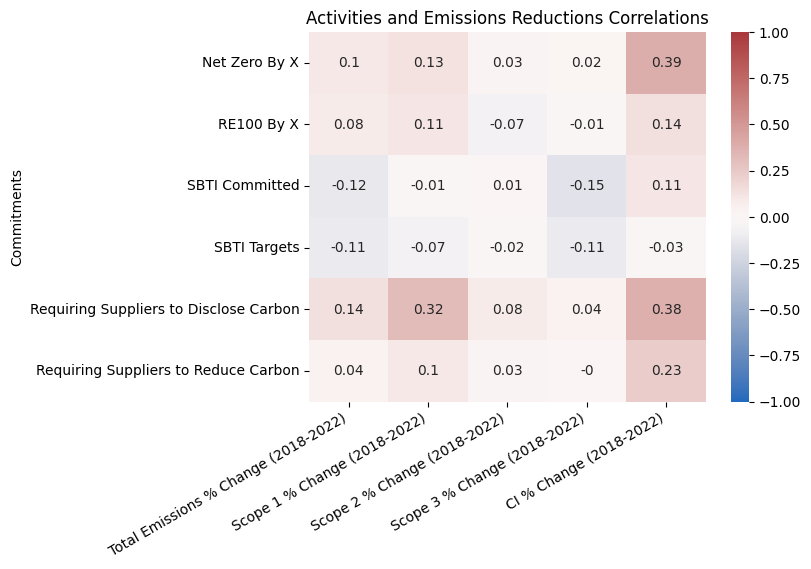

In [18]:
sns.heatmap(presentation_table, cmap='vlag', annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=30, ha='right')
plt.title('Activities and Emissions Reductions Correlations')
plt.show();

In [19]:
# full heatmap
plt.figure(figsize=[20,20])
sns.heatmap(activties_corr, cmap='vlag', annot=True)
plt.xticks(rotation=30, ha='right')
plt.show();